In [2]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Make plots look nicer
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# --- Load Data ---
df = pd.read_csv("C:/Users/dhiya/Downloads/archive (8)/retail_sales_dataset.csv")

In [10]:
# --- Basic Info ---
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1000, 9)

Data Types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [14]:
# --- Convert 'Date' Column to datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Feature Engineering  ---
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.day_name()

In [16]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,year,day_of_week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5,2023,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,11,2023,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,10,2023,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,12,2023,Tuesday


In [18]:
# --- Descriptive Statistics ---
print("\nDescriptive Statistics:\n")
print(df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].describe())


Descriptive Statistics:

          Quantity  Price per Unit  Total Amount         Age
count  1000.000000     1000.000000   1000.000000  1000.00000
mean      2.514000      179.890000    456.000000    41.39200
std       1.132734      189.681356    559.997632    13.68143
min       1.000000       25.000000     25.000000    18.00000
25%       1.000000       30.000000     60.000000    29.00000
50%       3.000000       50.000000    135.000000    42.00000
75%       4.000000      300.000000    900.000000    53.00000
max       4.000000      500.000000   2000.000000    64.00000


In [20]:
# --- Check for Duplicates ---
duplicates = df.duplicated().sum()
print(f"\nDuplicate Records: {duplicates}")


Duplicate Records: 0


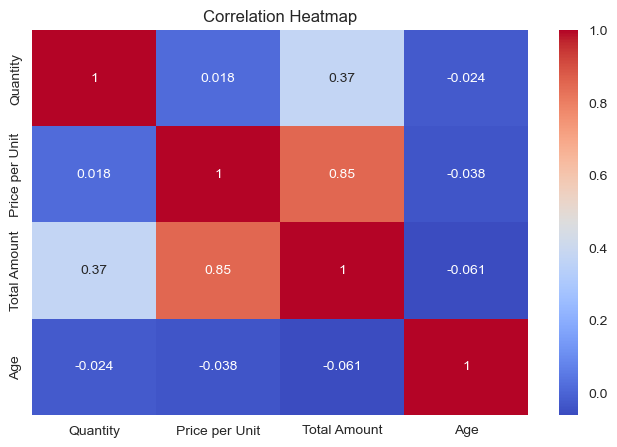

In [22]:
# --- Correlation Analysis ---
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

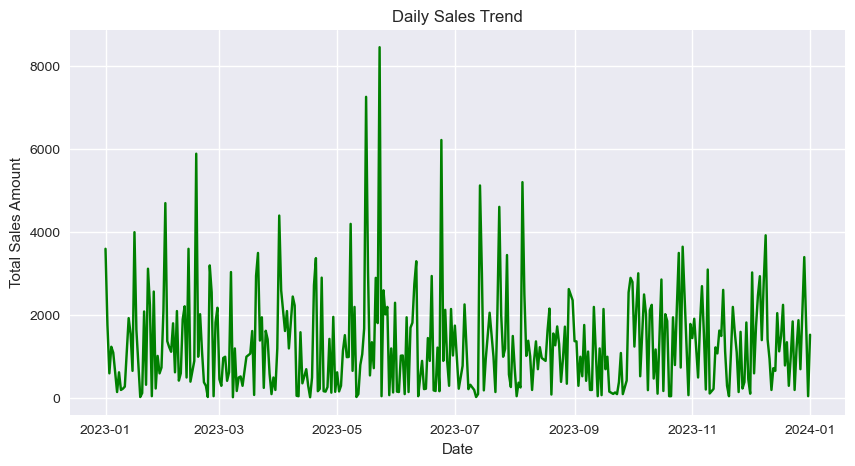

In [24]:
# 📈 TIME SERIES ANALYSIS
# =====================

# Aggregate sales by date
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], color='green')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

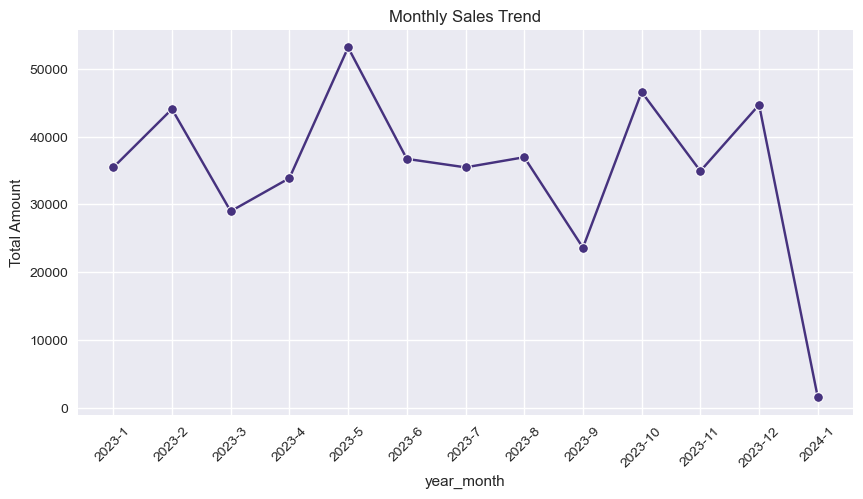

In [26]:
# Monthly trend
monthly_sales = df.groupby(['year', 'month'])['Total Amount'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + "-" + monthly_sales['month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(x='year_month', y='Total Amount', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

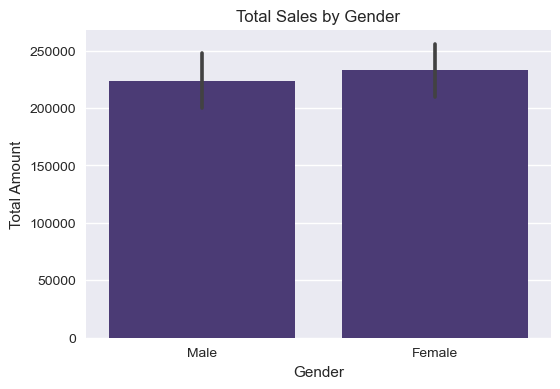

In [28]:
# CUSTOMER ANALYSIS
# =====================

# Gender-wise sales
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
plt.title("Total Sales by Gender")
plt.show()

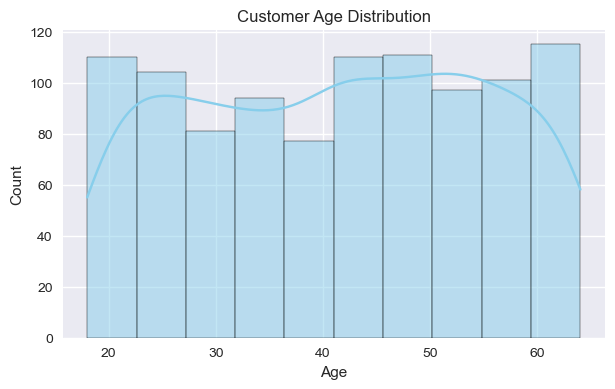

In [30]:
# Age distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\dhiya\AppData\Local\Temp\ipykernel_23268\3377519921.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['Total Amount'].sum().reset_index()


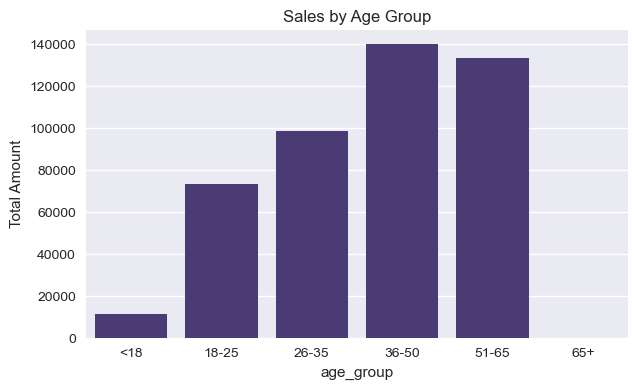

In [32]:
# Age group analysis
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 65, 100],
                         labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'])

age_sales = df.groupby('age_group')['Total Amount'].sum().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(x='age_group', y='Total Amount', data=age_sales)
plt.title("Sales by Age Group")
plt.show()

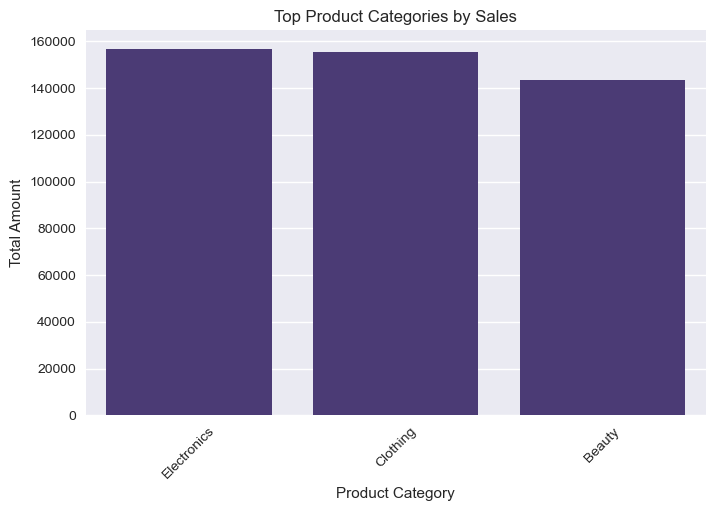

In [34]:
# PRODUCT ANALYSIS
# =====================

# Top product categories
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Product Category', y='Total Amount', data=top_products)
plt.title("Top Product Categories by Sales")
plt.xticks(rotation=45)
plt.show()

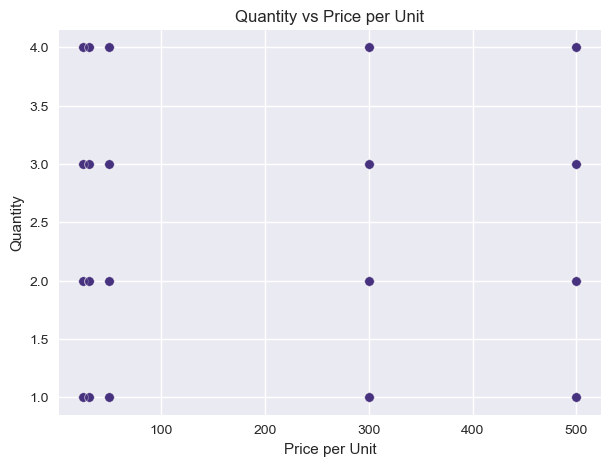

In [36]:
# Quantity vs Price
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Price per Unit', y='Quantity', data=df, alpha=0.6)
plt.title("Quantity vs Price per Unit")
plt.show()

In [38]:
#  INSIGHTS & RECOMMENDATIONS
# =====================

# Print some insights based on observed data
print("\n--- Insights & Recommendations ---")

print("1️ Peak sales months can guide inventory and marketing planning.")
print("2️ Gender-wise or age-group preferences can help personalize promotions.")
print("3️ Top product categories indicate where to focus sales efforts.")
print("4️ Regular customers (by customer_id frequency) can be targeted for loyalty programs.")

# Frequent customers
top_customers = df['Customer ID'].value_counts().head(5)
print("\nTop 5 Frequent Customers:\n", top_customers)


--- Insights & Recommendations ---
1️ Peak sales months can guide inventory and marketing planning.
2️ Gender-wise or age-group preferences can help personalize promotions.
3️ Top product categories indicate where to focus sales efforts.
4️ Regular customers (by customer_id frequency) can be targeted for loyalty programs.

Top 5 Frequent Customers:
 Customer ID
CUST001    1
CUST672    1
CUST659    1
CUST660    1
CUST661    1
Name: count, dtype: int64
